In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.2.0


In [4]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2020-07-07 03:54:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.17MB/s    in 52s     

2020-07-07 03:55:05 (5.91 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [6]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (867 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: 

In [7]:
!tree -d /tmp

/tmp
├── __MACOSX
│   └── rockpaperscissors
│       ├── paper
│       ├── rock
│       ├── rps-cv-images
│       │   ├── paper
│       │   ├── rock
│       │   └── scissors
│       └── scissors
└── rockpaperscissors
    ├── paper
    ├── rock
    ├── rps-cv-images
    │   ├── paper
    │   ├── rock
    │   └── scissors
    └── scissors

17 directories


In [8]:
!pip install split_folders tqdm

In [12]:
import split_folders,os

In [13]:
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/output_split", seed=1337, ratio=(.8, .2))

Copying files: 2188 files [00:00, 5033.18 files/s]


In [14]:
base_dir = '/tmp/rockpaperscissors/output_split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [15]:
os.listdir('/tmp/rockpaperscissors/output_split/train')

['rock', 'paper', 'scissors']

In [16]:
os.listdir('/tmp/rockpaperscissors/output_split/val')

['rock', 'paper', 'scissors']

In [17]:
import os
import shutil
# import split_folders

base_dir = '/tmp/rockpaperscissors/rps-cv-images/'
if ('data_model' in os.listdir(base_dir)):
  shutil.rmtree(os.path.join(base_dir, 'data_model'))

split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images/',
                    output ='/tmp/rockpaperscissors/rps-cv-images/data_model',
                    seed=None, ratio=(.8,.2))

print('\n')
# Rock
rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/rock')  
train_rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/train/rock')  
val_rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/val/rock')  

# Paper
paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/paper') 
train_paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/train/paper') 
val_paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/val/paper') 

# Scissors
scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/scissors') 
train_scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/train/scissors') 
val_scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/val/scissors') 


print('\nTotal Gambar Rock:', len(os.listdir(rock_dir)))
print('Train:', len(os.listdir(train_rock_dir)))
print('Validation:', len(os.listdir(val_rock_dir)))

print('\n')
print('Total Gambar Paper:', len(os.listdir(paper_dir)))
print('Train:', len(os.listdir(train_paper_dir)))
print('Validation:', len(os.listdir(val_paper_dir)))

print('\n')
print('Total Gambar Scissors:', len(os.listdir(scissors_dir)))
print('Train:', len(os.listdir(train_scissors_dir)))
print('Validation:', len(os.listdir(val_scissors_dir)))

print('\n')
print('Total Gambar Keseluruhan:', len(os.listdir(rock_dir))+len(os.listdir(paper_dir))+ len(os.listdir(scissors_dir)))

Copying files: 2188 files [00:00, 4349.49 files/s]




Total Gambar Rock: 726
Train: 580
Validation: 146


Total Gambar Paper: 712
Train: 569
Validation: 143


Total Gambar Scissors: 750
Train: 600
Validation: 150


Total Gambar Keseluruhan: 2188


In [18]:
#Hasil Split Folder
!tree -d /tmp/rockpaperscissors/rps-cv-images/data_model

/tmp/rockpaperscissors/rps-cv-images/data_model
├── train
│   ├── paper
│   ├── rock
│   └── scissors
└── val
    ├── paper
    ├── rock
    └── scissors

8 directories


In [19]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_dir = "/tmp/rockpaperscissors/rps-cv-images/data_model/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_dir = "/tmp/rockpaperscissors/rps-cv-images/data_model/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # First Convulation
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Second Convulation
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Third Convulation
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Fourth Convulation
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=28, steps_per_epoch=14,
    validation_data = validation_generator,
    verbose = 1,
    validation_steps=3)

model.save("rockpaperscissors.h5")

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

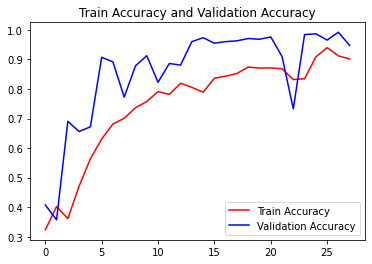

<Figure size 432x288 with 0 Axes>

In [20]:
# Untuk Memudahkan Memamhami Proses Validation dan Proses Training Maka diLakukan Visualisasi Data Menggunakan Matplotlib
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Train Accuracy and Validation Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving 2J7q0JbqJrjmZC05.png to 2J7q0JbqJrjmZC05.png
2J7q0JbqJrjmZC05.png
scissors


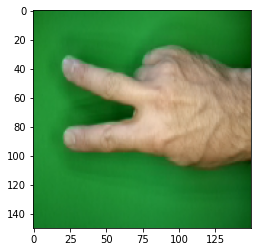

In [27]:
#Uji Coba Model Yang Telah diBuat

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  
  print(fn)
  # print(classes)

  if classes[0,0]==1:
    print('paper')
  elif classes[0,1]==1:
    print('rock')
  else:
    print('scissors')